In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('../input/ready.csv')

In [3]:
df

,ASVAB,FamilyIncome,HighSchoolGrade
0,45.070,50000,7.0
1,58.483,81000,5.0
2,27.978,150250,6.0
3,22.001,55000,3.0
4,3.585,14766,5.0
...,...,...,...
5165,18.599,38000,5.0
5166,12.716,30441,3.0
5167,27.785,33500,5.0
5168,96.478,40400,7.0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

**Let's see if there is any obivous trend between ASVAB and FamilyIncome**

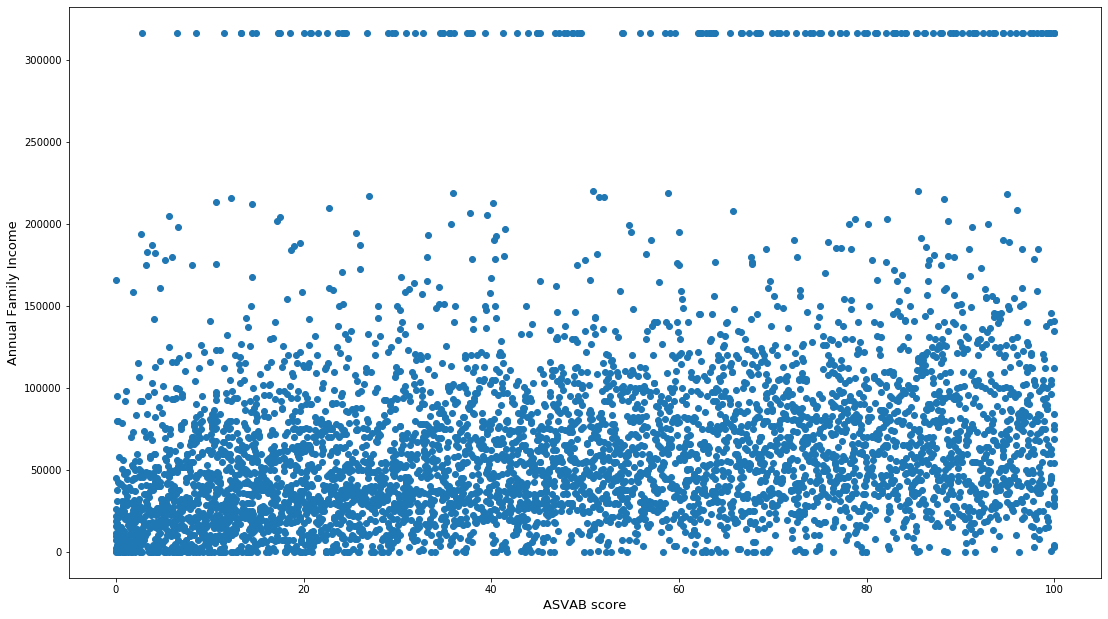

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.scatter(x = df.ASVAB, y =df.FamilyIncome)
plt.ylabel('Annual Family Income', fontsize=13)
plt.xlabel('ASVAB score', fontsize=13)
plt.show()
plt.close()

**After seeing the scatterplot we shoould be expecting almost no correlation. The 316618 FamilyIncome values seems like an outlier so we should probably remove them from the dataset.**

In [6]:
inds=df[df['FamilyIncome']==316618].index
print(len(df))
df=df.drop(inds,axis=0)
print(len(df))

5170
5020


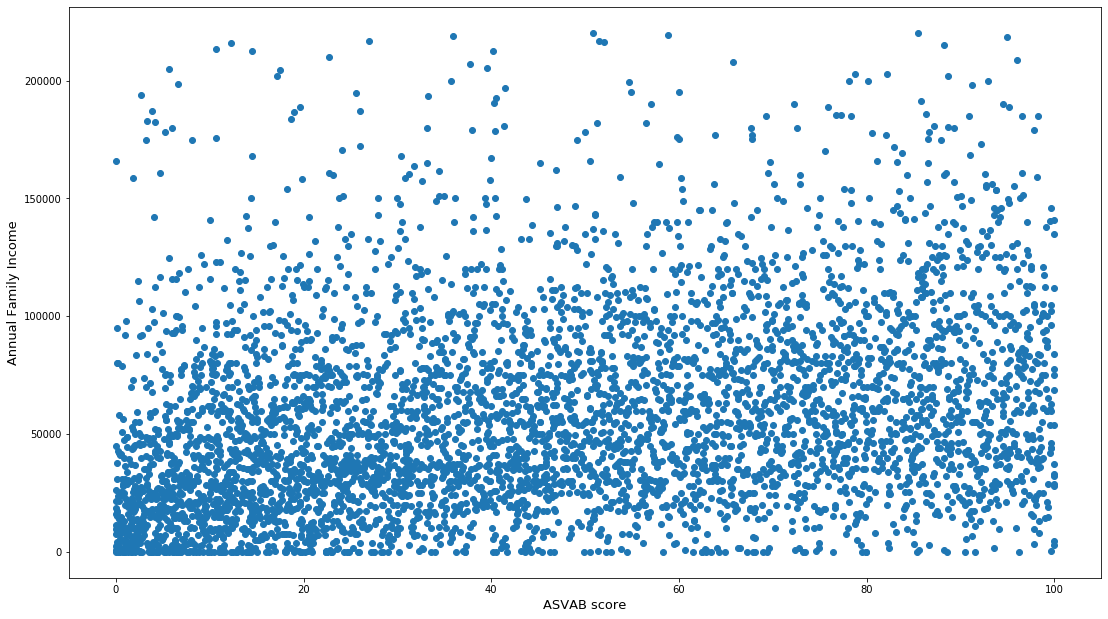

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.scatter(x = df.ASVAB, y =df.FamilyIncome)
plt.ylabel('Annual Family Income', fontsize=13)
plt.xlabel('ASVAB score', fontsize=13)
plt.show()
plt.close()

In [8]:
df.corr()

,ASVAB,FamilyIncome,HighSchoolGrade
ASVAB,1.000000,0.303217,0.473841
FamilyIncome,0.303217,1.000000,0.226380
HighSchoolGrade,0.473841,0.226380,1.000000


In [9]:
df.ASVAB.quantile(np.arange(0,1,0.04))


0.00     0.00000
0.04     2.72560
0.08     5.95088
0.12     9.14040
0.16    12.07020
0.20    15.16960
0.24    18.71160
0.28    22.01896
0.32    25.56696
0.36    29.59888
0.40    33.28300
0.44    37.22008
0.48    41.36704
0.52    45.52164
0.56    49.68008
0.60    53.86680
0.64    58.41060
0.68    63.07120
0.72    67.51284
0.76    72.16064
0.80    76.76700
0.84    81.45388
0.88    85.97496
0.92    90.46808
0.96    95.21824
Name: ASVAB, dtype: float64

In [10]:
import statistics 

prev=0
dic={}
for val, item in (df.ASVAB.quantile(np.arange(0,1,0.04)).items()):
    dic[val]=list(df[df.ASVAB>=prev][df.ASVAB<item].FamilyIncome)
    prev=item
dic[0]=[0]
mean_dic={k:statistics.mean(v) for k,v in dic.items()}
mean_dic[0]=statistics.mean(df[df.ASVAB==0].FamilyIncome)
print((mean_dic))


{0.0: 27145.75, 0.04: 25170.358208955226, 0.08: 38008.850746268654, 0.12: 39632.835820895525, 0.16: 40964.39800995025, 0.2: 46834.89, 0.24: 45785.50746268657, 0.28: 49110.04975124378, 0.32: 49759.63184079602, 0.36: 48135.955, 0.4: 58643.880597014926, 0.44: 54153.338308457714, 0.48: 65328.51243781095, 0.52: 51034.355, 0.56: 62258.99004975124, 0.6: 63993.477611940296, 0.64: 62524.23880597015, 0.68: 63693.065, 0.72: 66663.28855721393, 0.76: 69576.80099502488, 0.8: 67790.67164179105, 0.84: 71720.345, 0.88: 71302.6368159204, 0.92: 79958.36815920398, 0.96: 73460.69651741293}


<ipython-input-10-5385aaf6f3ca>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dic[val]=list(df[df.ASVAB>=prev][df.ASVAB<item].FamilyIncome)


In [11]:
print(df[df.ASVAB<=20].mean())
print(df[df.ASVAB>20][df.ASVAB<=40].mean())
print(df[df.ASVAB>40][df.ASVAB<=60].mean())
print(df[df.ASVAB>60][df.ASVAB<=80].mean())
print(df[df.ASVAB>80][df.ASVAB<=100].mean())


ASVAB                  9.768880
FamilyIncome       40288.185415
HighSchoolGrade        4.758728
dtype: float64
ASVAB                 29.704274
FamilyIncome       53292.468631
HighSchoolGrade        5.206274
dtype: float64
ASVAB                 49.711652
FamilyIncome       61274.145299
HighSchoolGrade        5.643162
dtype: float64
ASVAB                 69.998948
FamilyIncome       67219.892135
HighSchoolGrade        6.142697
dtype: float64
ASVAB                 90.072753
FamilyIncome       74299.494725
HighSchoolGrade        6.906213
dtype: float64


<ipython-input-11-bc766c79ff27>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df.ASVAB>20][df.ASVAB<=40].mean())
<ipython-input-11-bc766c79ff27>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df.ASVAB>40][df.ASVAB<=60].mean())
<ipython-input-11-bc766c79ff27>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df.ASVAB>60][df.ASVAB<=80].mean())
<ipython-input-11-bc766c79ff27>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df.ASVAB>80][df.ASVAB<=100].mean())


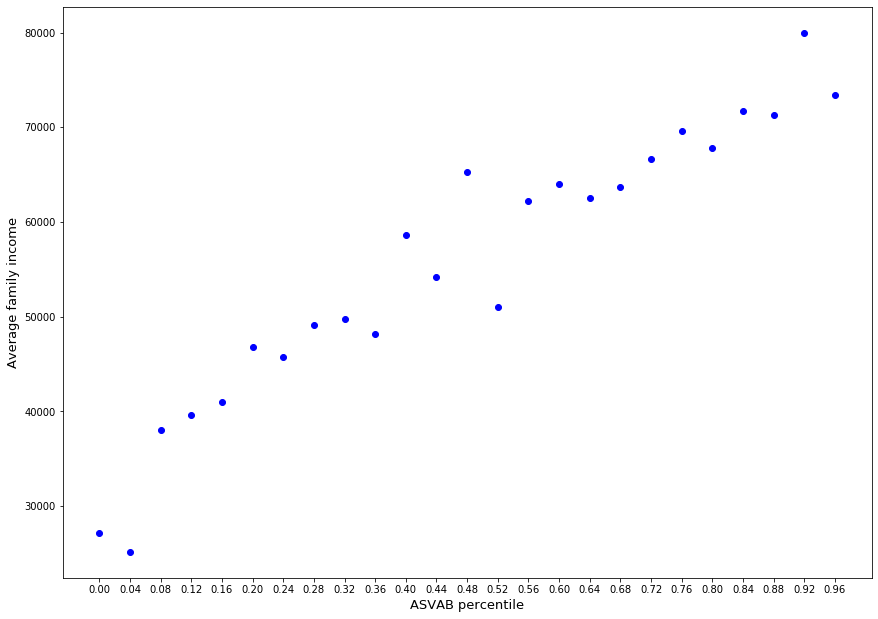

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(14.5, 10.5)

ax.plot(list(mean_dic.keys()),list(mean_dic.values()),'bo')
plt.xticks(list(mean_dic.keys()))
plt.ylabel('Average family income', fontsize=13)
plt.xlabel('ASVAB percentile', fontsize=13)
plt.show()
plt.close()

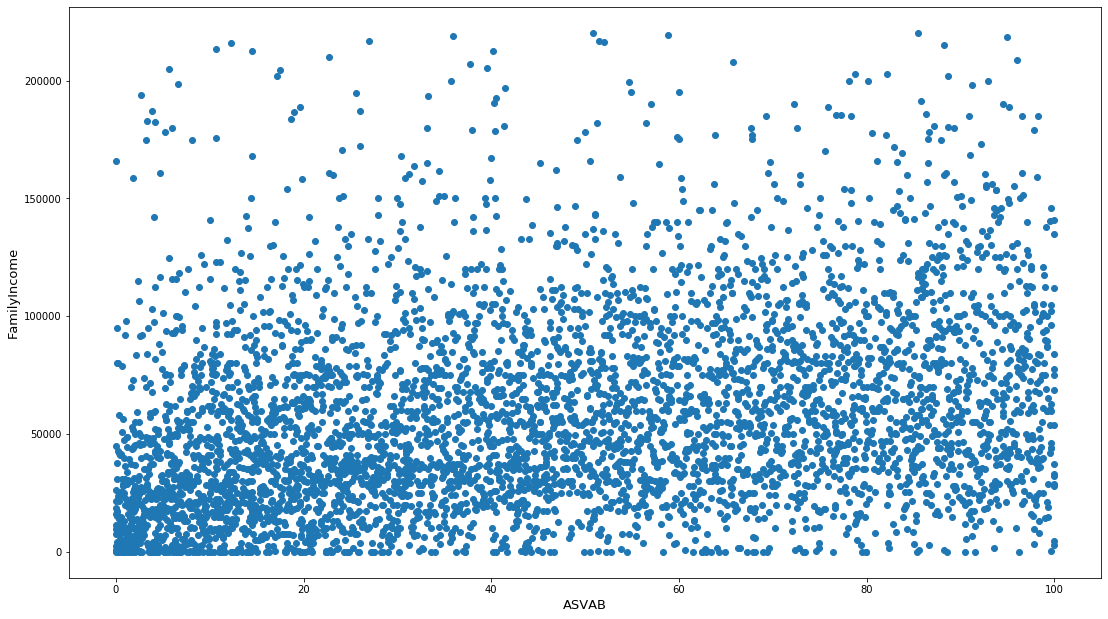

In [13]:

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

ax.scatter(x = df.ASVAB, y =df.FamilyIncome)
plt.ylabel('FamilyIncome', fontsize=13)
plt.xlabel('ASVAB', fontsize=13)
plt.show()
plt.close()

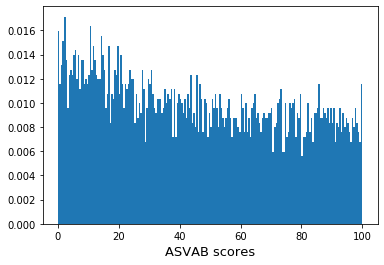

In [14]:
# Let's check the distribution of the ASVAB scores
plt.hist(df.ASVAB,bins=200,density=True)
plt.xlabel('ASVAB scores', fontsize=13)
plt.show()
plt.close()

In [15]:
df

,ASVAB,FamilyIncome,HighSchoolGrade
0,45.070,50000,7.0
1,58.483,81000,5.0
2,27.978,150250,6.0
3,22.001,55000,3.0
4,3.585,14766,5.0
...,...,...,...
5165,18.599,38000,5.0
5166,12.716,30441,3.0
5167,27.785,33500,5.0
5168,96.478,40400,7.0


**Let's see if there is any obivous trend between FamilyIncome and HighSchoolGrade**

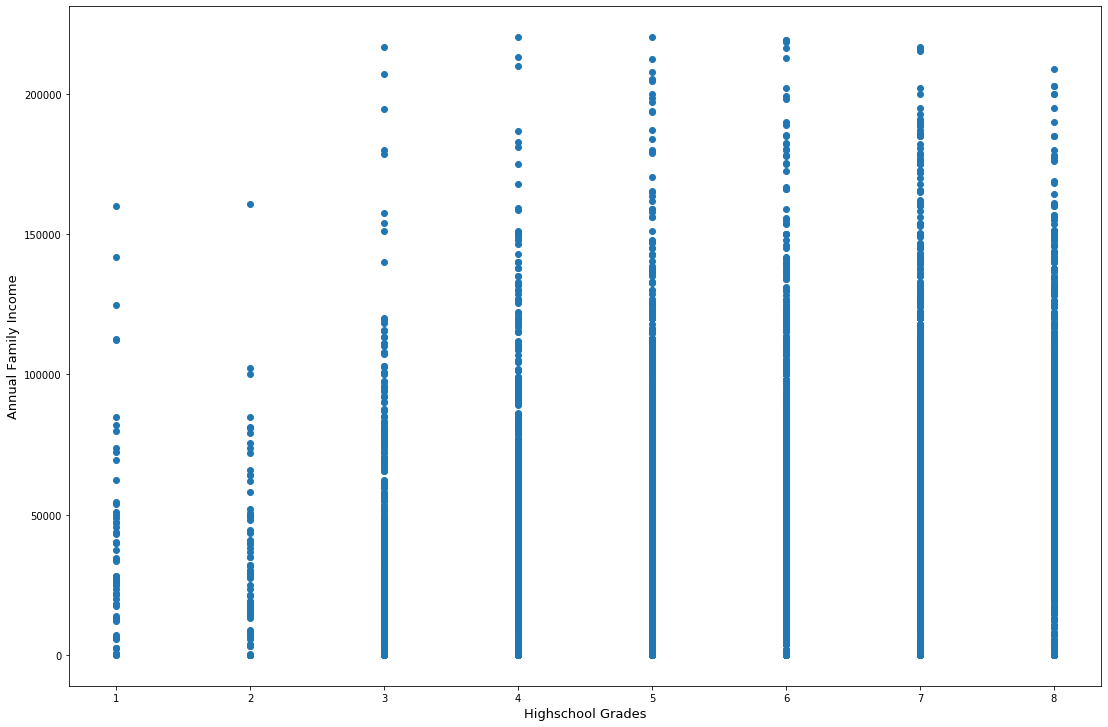

In [16]:
fig,ax=plt.subplots()
fig.set_size_inches(18.5, 12.5)

ax.scatter(x = df.HighSchoolGrade, y =df.FamilyIncome)
plt.ylabel('Annual Family Income', fontsize=13)
plt.xlabel('Highschool Grades', fontsize=13)
plt.show()
plt.close()

**There definitely seems to be a higher average income for higher grades**

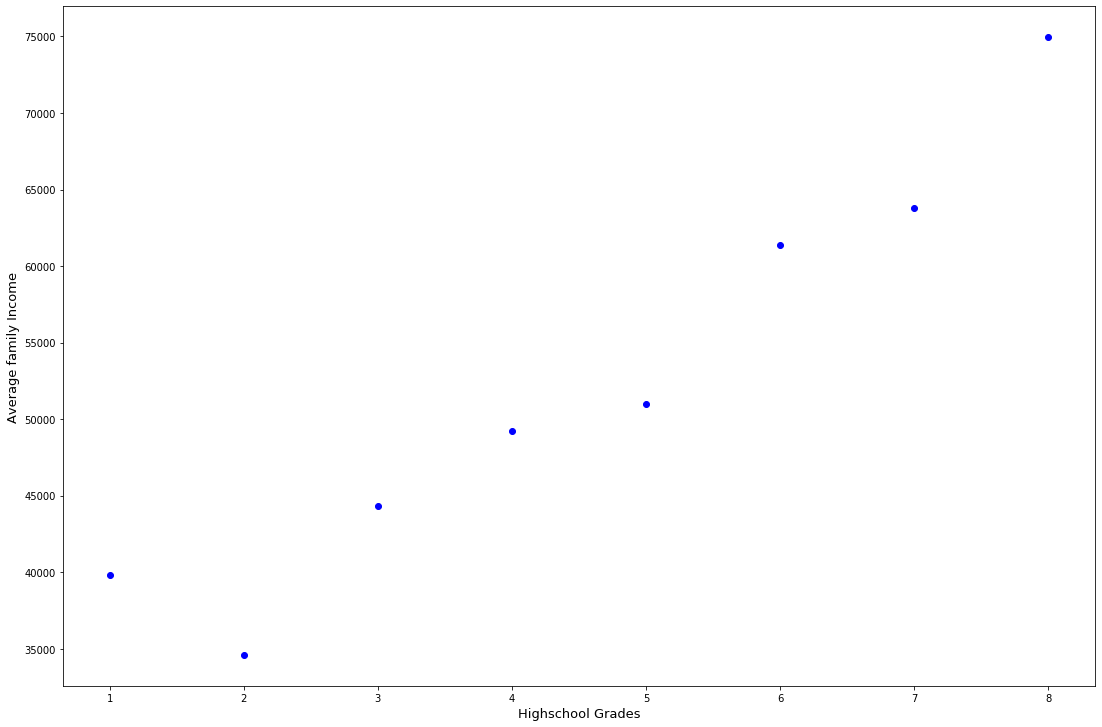

In [17]:
ave_income=[]
for i in range(1,9):
    ave_income.append(df[df.HighSchoolGrade==i].FamilyIncome.mean())
    

fig,ax=plt.subplots()
fig.set_size_inches(18.5, 12.5)

ax.plot( range(1,9),ave_income,'bo')
plt.ylabel('Average family Income', fontsize=13)
plt.xlabel('Highschool Grades', fontsize=13)
plt.show()
plt.close()


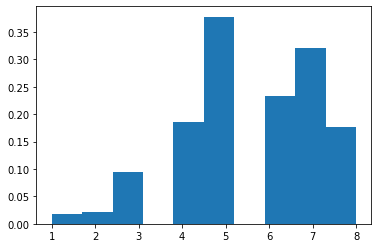

In [18]:
# Let's check the distribution of the HighSchoolGrades 

plt.hist(df.HighSchoolGrade,density=True)
plt.show()
plt.close()

In [19]:
# Let's check whether the correlation between the ASVAB and HighSchoolGrade is high enough to be removed
df.corr()

,ASVAB,FamilyIncome,HighSchoolGrade
ASVAB,1.000000,0.303217,0.473841
FamilyIncome,0.303217,1.000000,0.226380
HighSchoolGrade,0.473841,0.226380,1.000000


In [20]:
X=df[['ASVAB','HighSchoolGrade']]
y=df['FamilyIncome']
print(X,y)

       ASVAB  HighSchoolGrade
0     45.070              7.0
1     58.483              5.0
2     27.978              6.0
3     22.001              3.0
4      3.585              5.0
...      ...              ...
5165  18.599              5.0
5166  12.716              3.0
5167  27.785              5.0
5168  96.478              7.0
5169  71.549              5.0

[5020 rows x 2 columns] 0        50000
1        81000
2       150250
3        55000
4        14766
         ...  
5165     38000
5166     30441
5167     33500
5168     40400
5169     19643
Name: FamilyIncome, Length: 5020, dtype: int64


In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
ASVAB,352.679752
HighSchoolGrade,2759.348803


In [23]:
regressor.score(X, y)

0.100761010727623